# (1) USD/HKD

### API Source: Hong Kong Monetary Authority (HKMA)
### API Detailed Documentation: https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/monthly-statistical-bulletin/er-ir/er-eeri-daily/

In [1]:
import urllib.request
import requests
import pandas as pd
import yaml
import time
import ssl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from urllib3.exceptions import InsecureRequestWarning

In [2]:
# Suppress only the single warning from urllib3 needed.
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)

ctx = ssl.SSLContext(ssl.PROTOCOL_SSLv23)

offset_num=0
df = []

while offset_num < 300:
    
    try:
        #api-endpoint
        url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/er-eeri-daily?offset={}".format(offset_num)
    
        JSONContent = requests.get(url, verify=False)
    
        if JSONContent.status_code == 200:
            with urllib.request.urlopen (url, context=ctx) as req:
                myData = yaml.load(req.read())
        
                df.append(pd.DataFrame(myData['result']['records'],columns=myData['result']['records'][0].keys()&{'end_of_day', 'usd'}))
                offset_num += 100
            
                time.sleep(10)
                
    except ConnectionError:
        break
        print("Connection refused")

df_final = pd.concat(df)
print("Total scrapped " + str(len(df_final.index)) + " data points.")
    
#for key, value in myData.items():
        #print (key + " : " + str(value))

Total scrapped 300 data points.


In [3]:
df_final['end_of_day'] = pd.to_datetime(df_final['end_of_day'])
df_final.set_index('end_of_day',inplace=True)

# Select observations during 2019
df_final = df_final.loc['2019']

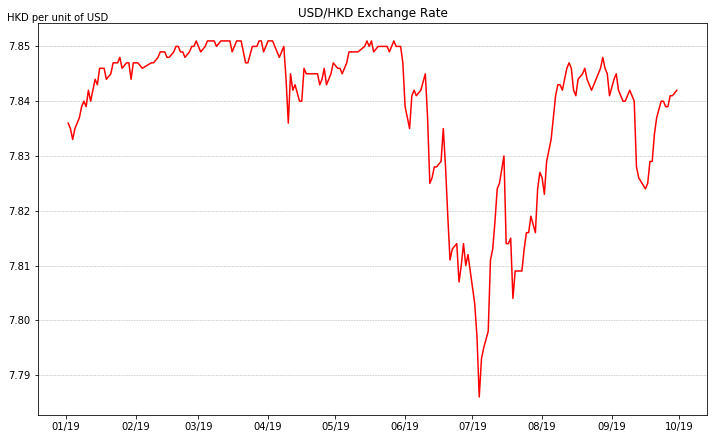

In [4]:
%matplotlib inline

ax = df_final.plot(figsize=(12, 8), title='USD/HKD Exchange Rate', color='red', legend=False)
plt.ylabel('HKD per unit of USD', rotation = 0)
plt.xlabel('')
ax.yaxis.set_label_coords(0.03,1)

plt.xticks(rotation=0, horizontalalignment='center')

# Define the date format
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)

#customize the major grid
ax.yaxis.grid(which='major', linestyle='--', linewidth='0.5')

"Under the Linked Exchange Rate system (LERS), the HKMA acts as a “super money changer”. When there are fund inflows, the HKD exchange rate against the US dollar (USD) will not go beyond 7.75 as there is strong-side Convertibility Undertaking.  On the other hand, when there are fund outflows and the HKD weakens, the HKMA will sell USD and buy HKD at 7.85 so that the HKD exchange rate will not fall below the weak-side Convertibility Undertaking."
  
-- Norman Chan (Mar-2018) 

In [5]:
#import json

#api-endpoint
#url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/er-eeri-daily?offset=0"

#JSONContent = requests.get(url).json()
#content = json.dumps(JSONContent['result'],indent = 3)

# USD/CNY Exchange Rates

### API Source: https://exchangeratesapi.io/

### Exchange rates API is a free service for current and historical foreign exchange rates published by the European Central Bank

In [6]:
#set parameter
date_from = '2014-01-01'
date_to = '2019-09-30'

#api-endpoint
url = "https://api.exchangeratesapi.io/history?base=USD&symbols=CNY&start_at={}&end_at={}".format(date_from, date_to)
JSONContent = requests.get(url).json()

with urllib.request.urlopen (url) as req:
    myData1 = yaml.load(req.read())
    
df1 = pd.DataFrame.from_dict(myData1['rates'], orient='index')

df1.index = pd.to_datetime(df1.index)

#round exchange rate to 4 decimal places
df1.round(4)

print("Total scrapped " + str(len(df1.index)) + " USD/CNY data points.")

Total scrapped 1469 USD/CNY data points.


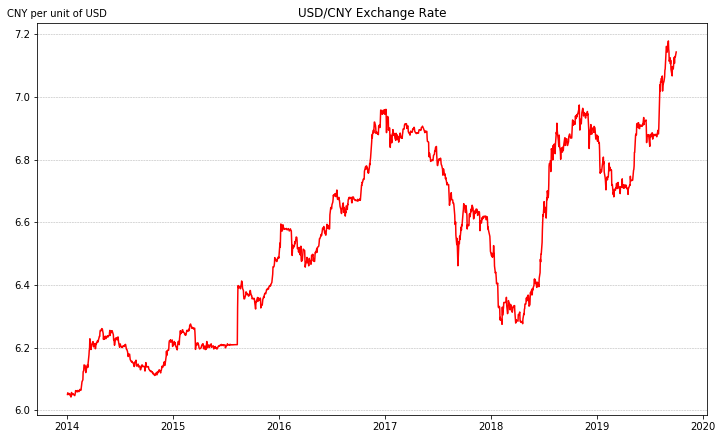

In [7]:
%matplotlib inline

ax1 = df1.plot(figsize=(12, 8), title='USD/CNY Exchange Rate', color='red', legend=False)
plt.ylabel('CNY per unit of USD', rotation = 0)
ax1.yaxis.set_label_coords(0.03,1.01)

plt.xticks(rotation=0, horizontalalignment='center')

#customize the major grid
ax1.yaxis.grid(which='major', linestyle='--', linewidth='0.5')

"Beijing’s decision to let yuan fall below key 7.0 level against US dollar means it has decided to use yuan as tool to fight the trade war, analysts said"
-- SCMP (6 Aug 2019)

"China dropped the price of their currency to an almost a historic low. It’s called 'currency manipulation'."
-- Donald Trump's tweet (5 Aug 2019)